/var/folders/tr/m7nnfyd94_jfxmdwqvwq7hg40000gn/T/ipykernel_31556/1344688891.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='2024-01-01', end='2024-01-10', freq='H')


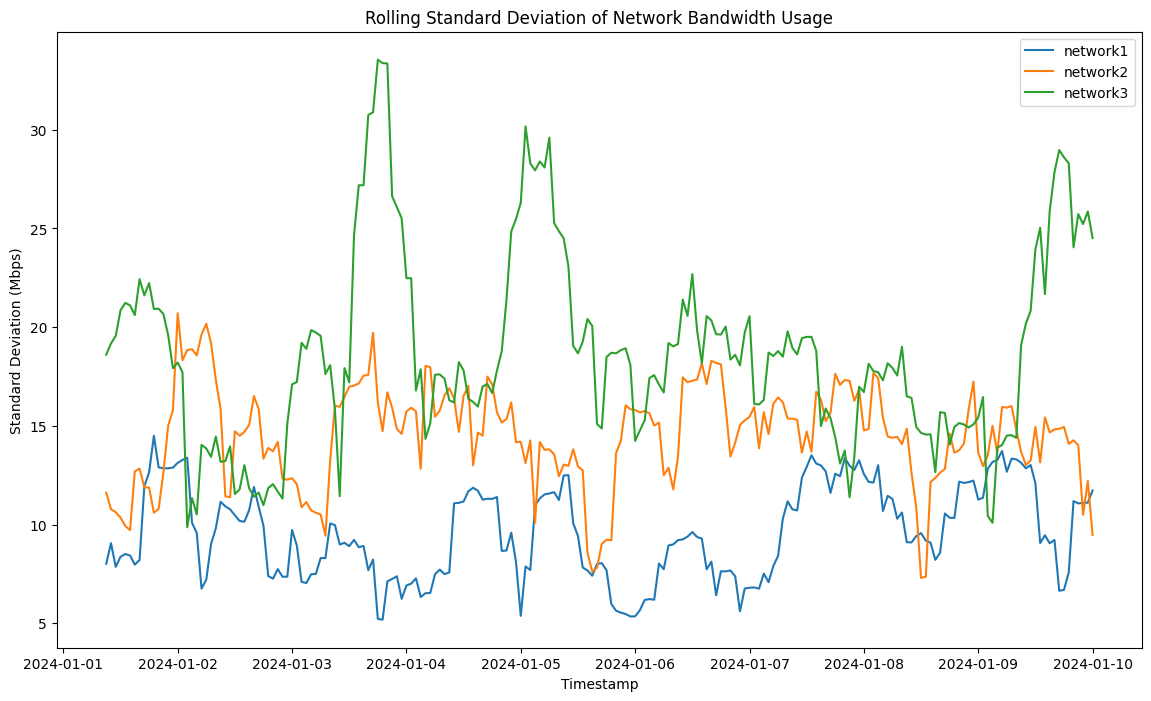

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Synthetic Data
date_rng = pd.date_range(start='2024-01-01', end='2024-01-10', freq='H')
data = pd.DataFrame(date_rng, columns=['timestamp'])
data['network1'] = np.random.normal(loc=50, scale=10, size=(len(date_rng)))
data['network2'] = np.random.normal(loc=60, scale=15, size=(len(date_rng)))
data['network3'] = np.random.normal(loc=70, scale=20, size=(len(date_rng)))
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Save to CSV
data.to_csv('network_bandwidth.csv')

# Step 2: Load Network Bandwidth Data
data = pd.read_csv('network_bandwidth.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Step 3: Calculate Fluctuations
window_size = 10  # for example, 10 time units
rolling_std = data.rolling(window=window_size).std()

# Plot the rolling standard deviation
plt.figure(figsize=(14, 8))
for column in data.columns:
    plt.plot(rolling_std.index, rolling_std[column], label=column)

plt.title('Rolling Standard Deviation of Network Bandwidth Usage')
plt.xlabel('Timestamp')
plt.ylabel('Standard Deviation (Mbps)')
plt.legend()
plt.show()


